In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Recurrent Neural Networks

It is a type of Neural Network implementation , which remembers information from the previous iterations for its prediction . At each level (in the hidden layer) a feedback loop is recursively used to pass the current information in those nodes to the same nodes in the next iteration . This way at each iteration the value passed as output will be the combination of the current and previous input in some combined information format .



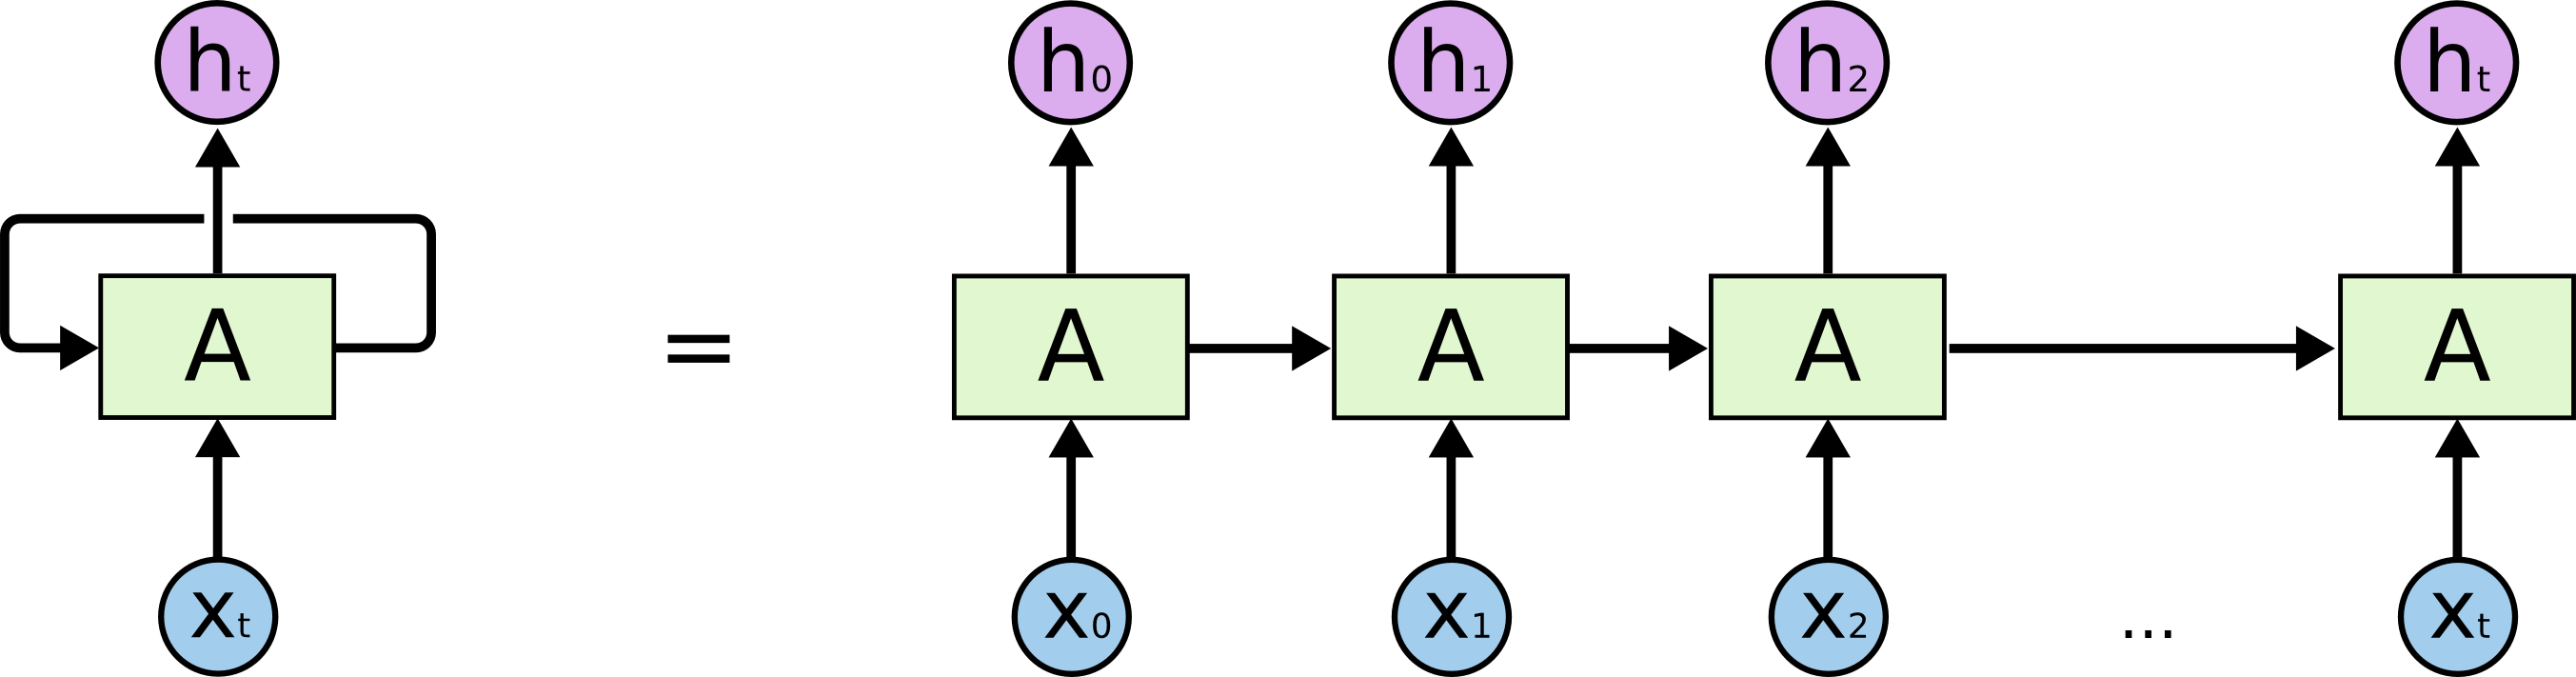



So these kinds of Neural networks try to make a prediction by understanding the inputs as a **Sequence** .

**Intuition :** In order to make a prediction keeping in mind the sequence generated up until now , we maintain another set of *weighted hyperparameters* that keeps track of the sequence of inputs . This is then used along with the current input to get the output (aaaaaaand.... repeat).



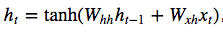



The *tanh* function takes in input the *current input* and the weighted average of the *previous sequence of inputs* 

*Important links :*

[https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9](http://)

[https://medium.com/x8-the-ai-community/understanding-recurrent-neural-networks-in-6-minutes-967ab51b94fe](http://)

[https://medium.com/explore-artificial-intelligence/an-introduction-to-recurrent-neural-networks-72c97bf0912](http://)

In [ ]:
#importing common libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# creating a dataframe of the data

test = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv')
train = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv')
test_labels = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test_labels.csv')

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
test_labels.head()

In [ ]:
train.isnull().any()

In [ ]:
test.isnull().any()

In [ ]:
train.columns.values

In [ ]:
list_classes = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
y = train[list_classes].values

list_sentences_train = train['comment_text']
list_sentences_test = test['comment_text']

In [ ]:
from keras.preprocessing.text import Tokenizer

max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))

list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [ ]:
list_tokenized_train[:1]


In [ ]:
from keras.preprocessing.sequence import pad_sequences
max_len = 200

X_train = pad_sequences(list_tokenized_train,maxlen=max_len)
X_test = pad_sequences(list_tokenized_test,maxlen=max_len)

In [ ]:
NumWords = [len(com) for com in list_tokenized_train]

In [ ]:
sns.distplot(NumWords,bins=50)

In [ ]:
from keras.layers import Dense,Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
inp = Input(shape= (max_len,))

In [ ]:
from keras.models import Sequential

embed_size = 128

model = Sequential()
model.add(Embedding(max_features,embed_size))
model.add(LSTM(60,return_sequences=True, name='lstm_layer'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs=1

model.fit(X_train,y,batch_size=batch_size,epochs=epochs,validation_split=0.1)


In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

In [ ]:
len(predictions)

In [ ]:
pred = pd.DataFrame(predictions,columns=list_classes)

In [ ]:
pred.head()

In [ ]:
sub = pd.concat([test['id'], pred],axis=1)

In [ ]:
sub.head()

In [ ]:
sub.to_csv('out.csv',index=False)
